### Used to copy datasets after prepocessing from original folder to current project folder 

In [12]:
import shutil
import os
from Utils.defs_PhyAI import SEP, TREES_PER_DS, SUMMARY_PER_DS


def copy_entire_folder(src, dst):
    """
    Copies the entire folder, including the folder itself, from the source (src) to the destination (dst).
    :param src: Source folder path
    :param dst: Destination folder path
    """
    # Check if the source folder exists
    if not os.path.exists(src):
        raise FileNotFoundError(f"The source folder {src} does not exist.")
    # Extract the folder name from the source path and append it to the destination path
    folder_name = os.path.basename(src)
    dst = os.path.join(dst, folder_name)
    # Check if the final destination path exists. If it does, raise an error to avoid overwriting.
    if os.path.exists(dst):
        raise FileExistsError(f"The destination folder {dst} already exists.")
    # Copy the folder
    shutil.copytree(src, dst)


dest_path = './data/validation_data/'
# ds_path = './data/additional_training_data/'
# dest_path = './data/training_data/'
# ds_path = './data/test_data/'
ds_path = '/Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/'
#ds_path = '/Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/training_data/'

dirList = [name for name in os.listdir(
    ds_path) if os.path.isdir(os.path.join(ds_path, name))]
print(f'--------- TOTAL DIR: {len(dirList)}')
counter = 0
for folder_name in dirList:
	CWD = ds_path + folder_name + SEP
	if os.path.exists(TREES_PER_DS.format(CWD)) and os.path.exists(SUMMARY_PER_DS.format(CWD, 'prune')) and os.path.exists(SUMMARY_PER_DS.format(CWD, 'rgft')):
		counter += 1
		if os.path.exists(dest_path+folder_name):
			# delete_folder(dest_path+folder_name)
			print(
			    f'--------- SKIPPED {ds_path} {folder_name} -> {counter}/{len(dirList)}')
		else:
			copy_entire_folder(ds_path + folder_name, dest_path)
			print(
			    f'COPIED {counter}/{len(dirList)} {folder_name} FROM {ds_path} TO {dest_path}')

--------- TOTAL DIR: 999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ 9_PF00967 -> 1/999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ exons_11_ENSG00000165655_ZNF503_000 -> 2/999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ cds_13_ENSG00000174021_GNG5 -> 3/999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ exons_7_ENSG00000156675_RAB11FIP1_001 -> 4/999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ exons_11_ENSG00000182261_NLRP10_000 -> 5/999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ 39_PF04173 -> 6/999
--------- SKIPPED /Users/mihaid/Coding-Projects/thesis/others/harness_ML_phy-tree-search/validation_data/ exons_12_ENSG0000007

### Use to delete datasets that contain string errors because for some datasets RaxML-NG wasn't able to define the likelihooh, so a string error is present instead of the ll value.

In [13]:
import os
import csv
from Utils.defs_PhyAI import SEP, TREES_PER_DS, SUMMARY_PER_DS
import shutil


def delete_folder(folder_path):
    """
    Deletes the specified folder and all its contents.
    :param folder_path: Path to the folder to be deleted
    """
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Delete the folder
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' has been deleted.")
    else:
        print(f"Folder '{folder_path}' does not exist.")

def read_string(file_path):
	with open(file_path, 'r', encoding='utf-8') as file:
		reader = csv.reader(file)
		for row in reader:
			for cell in row:
				if "unknown raxml-ng error" in cell:
					print(file_path)
					return True


#ds_path = './data/training_data/'
ds_path = './data/validation_data/'

dirList = [name for name in os.listdir(
    ds_path) if os.path.isdir(os.path.join(ds_path, name))]
print(f'--------- TOTAL DIR: {len(dirList)}')
counter = 0
for folder_name in dirList:
	CWD = ds_path + folder_name + SEP
	if os.path.exists(SUMMARY_PER_DS.format(CWD, 'prune')):
		file_path = SUMMARY_PER_DS.format(CWD, 'prune')
		if read_string(file_path):
			delete_folder(CWD)
	if os.path.exists(SUMMARY_PER_DS.format(CWD, 'rgft')):
		file_path = SUMMARY_PER_DS.format(CWD, 'rgft')
		read_string(file_path)
		if read_string(file_path):
			delete_folder(CWD)
	counter += 1
	# print(f'--------- SKIPPED {ds_path} {folder_name} {folder_name} -> {counter}/{len(dirList)}')

--------- TOTAL DIR: 369


## Datasets Statistics

In [6]:
import pandas as pd

COLS_TO_DROP = ['prune_name','rgft_name','orig_ds_ll','ll_prune','time_prune',
                'd_ll_prune', 'orig_ds_id','ll_rgft','time_rgft' ]                 
#                'name2ntaxa_pruned_prune','name2ntaxa_remaining_prune',
#                'name2ntaxa_pruned_rgft','name2ntaxa_remaining_rgft']

TARGET_COL = 'd_ll_merged'

file_path = './data/training_data/learning_all_moves.csv'
df = pd.read_csv(file_path, index_col='iteration', low_memory=False)
df = df.drop(COLS_TO_DROP, axis=1)

/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

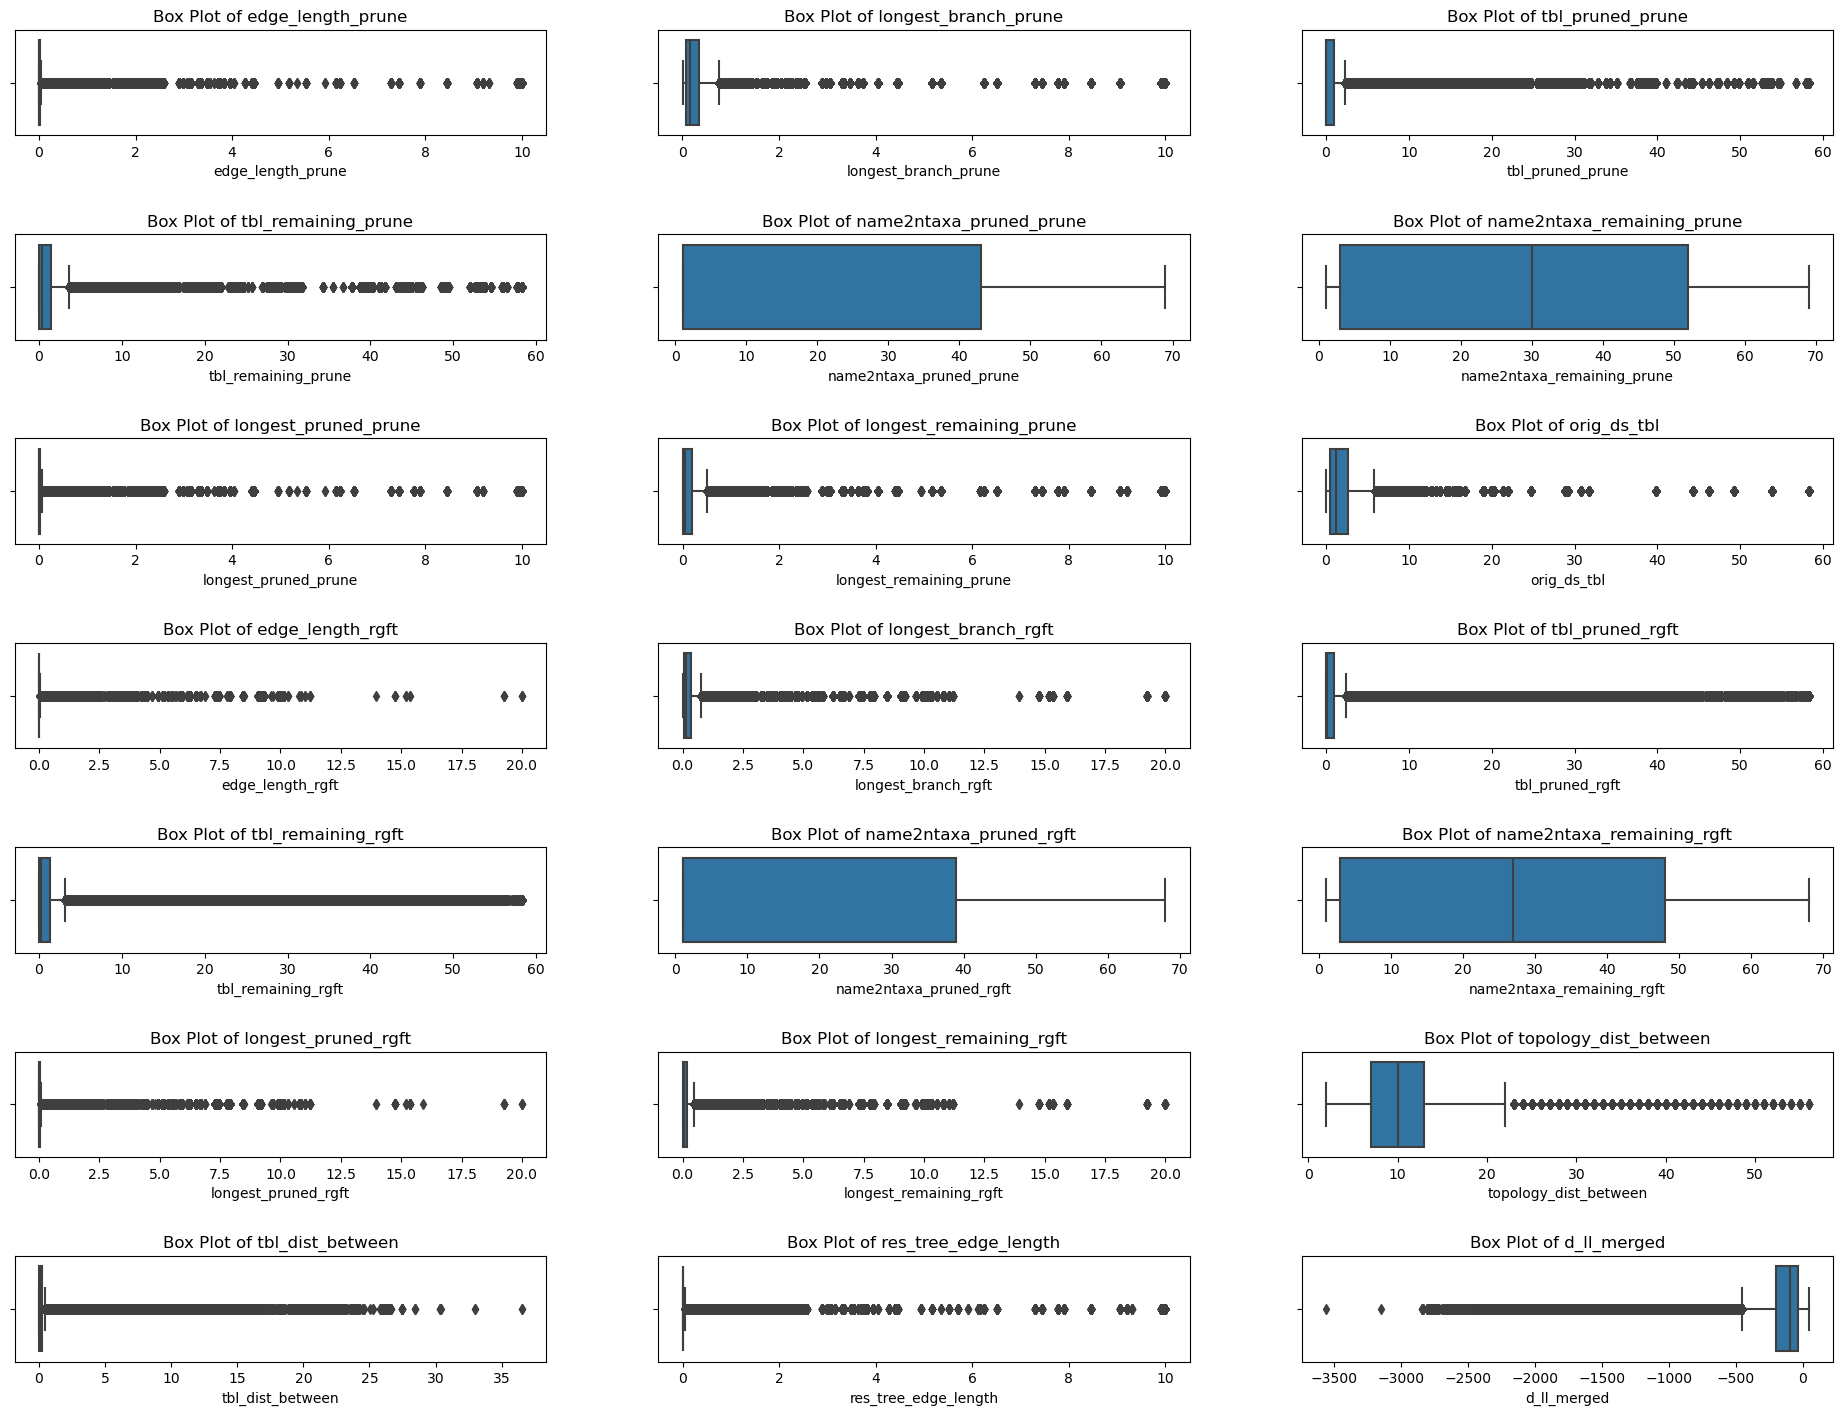

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = 7

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

# Hide any unused subplots
for i in range(i + 1, n_rows * n_cols):
    axes[i // n_cols, i % n_cols].axis('off')

plt.show()


/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mihaid/opt/anaconda3/envs/phytree/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

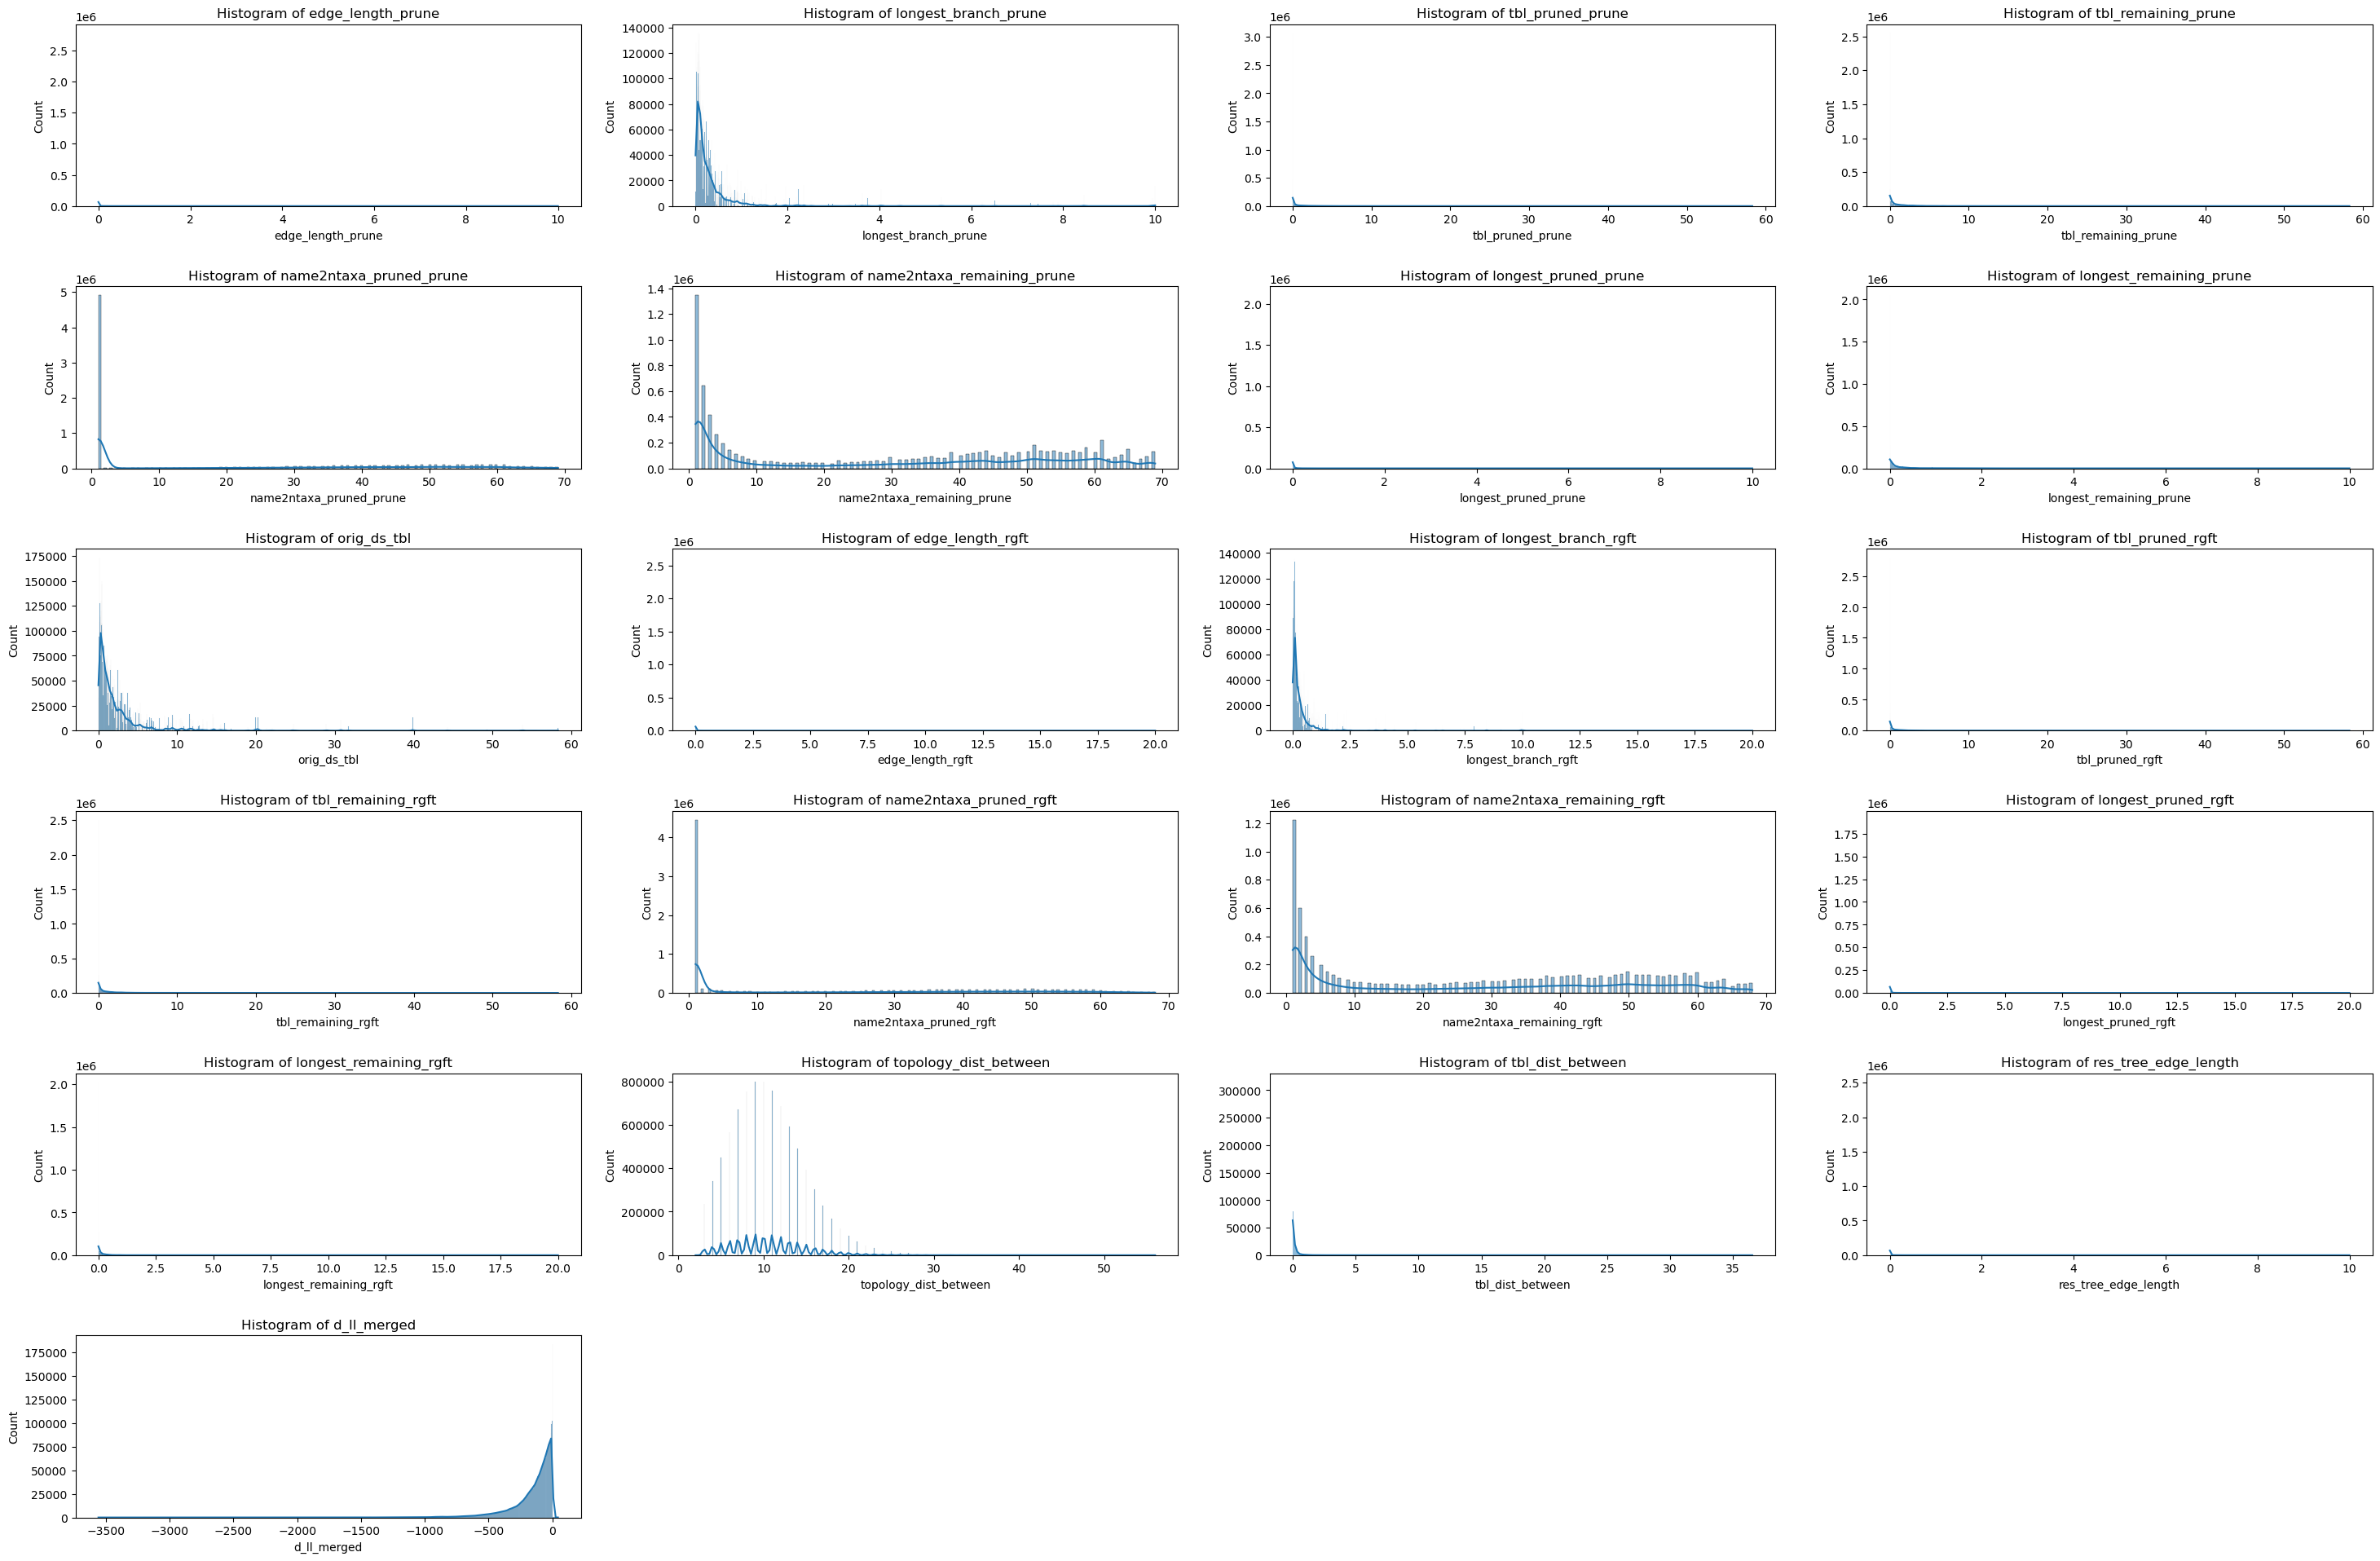

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 4
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 20))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')

# Hide any unused subplots
for i in range(i + 1, n_rows * n_cols):
    axes[i // n_cols, i % n_cols].axis('off')

plt.show()


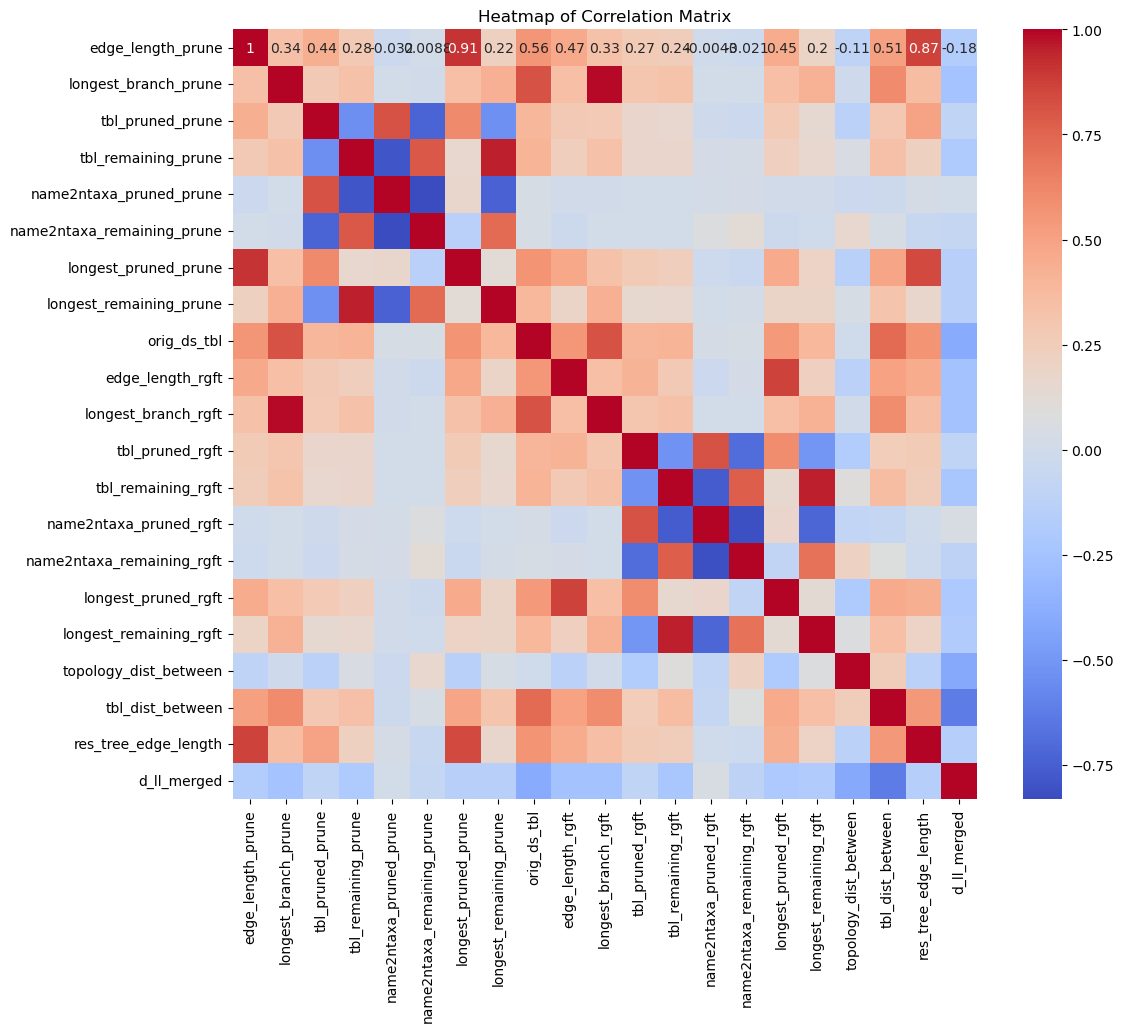

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show() 


In [10]:
# Pairplot (scatterplot matrix) of the DataFrame
#sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
#plt.show()